In [1]:
library(tidyverse)
library(repr)
library(tidymodels)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks read

In [44]:
cleveland <- read_csv("heart_cleveland_upload.csv")

Rows: 297 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (14): age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpea...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [45]:
cleveland_selected <- cleveland |>
    select(age, sex, ca, trestbps, thalach, chol, condition) |>
    mutate(condition = as_factor(condition))
cleveland_selected

age,sex,ca,trestbps,thalach,chol,condition
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
69,1,1,160,131,234,0
69,0,2,140,151,239,0
66,0,0,150,114,226,0
65,1,1,138,174,282,1
64,1,0,110,144,211,0
64,1,0,170,155,227,0
63,1,0,145,150,233,0
61,1,2,134,145,234,1
60,0,0,150,171,240,0


In [46]:
cleveland_split <- initial_split(cleveland_selected, prop = 0.75, strata = condition)
cleveland_train <- training(cleveland_split)
cleveland_test <- testing(cleveland_split)

In [48]:
cleveland_table_sum <- cleveland_train |>
    group_by(condition) |>
    summarize(numOfRows = n())

cleveland_table_mean <- cleveland_train |>
    group_by(condition) |>
    select(age, trestbps, chol, thalach) |>
    summarize(average_age = mean(age), average_trestbps = mean(trestbps), average_chol = mean(chol), average_thalach = mean(thalach))

cleveland_table <- cleveland_table_sum |>
    full_join(cleveland_table_mean)

#Generating the table

Adding missing grouping variables: `condition`
Joining with `by = join_by(condition)`


condition,numOfRows,average_age,average_trestbps,average_chol,average_thalach
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,120,52.18333,127.5000,240.0917,158.2667
1,102,56.82353,133.2157,250.9902,139.8333


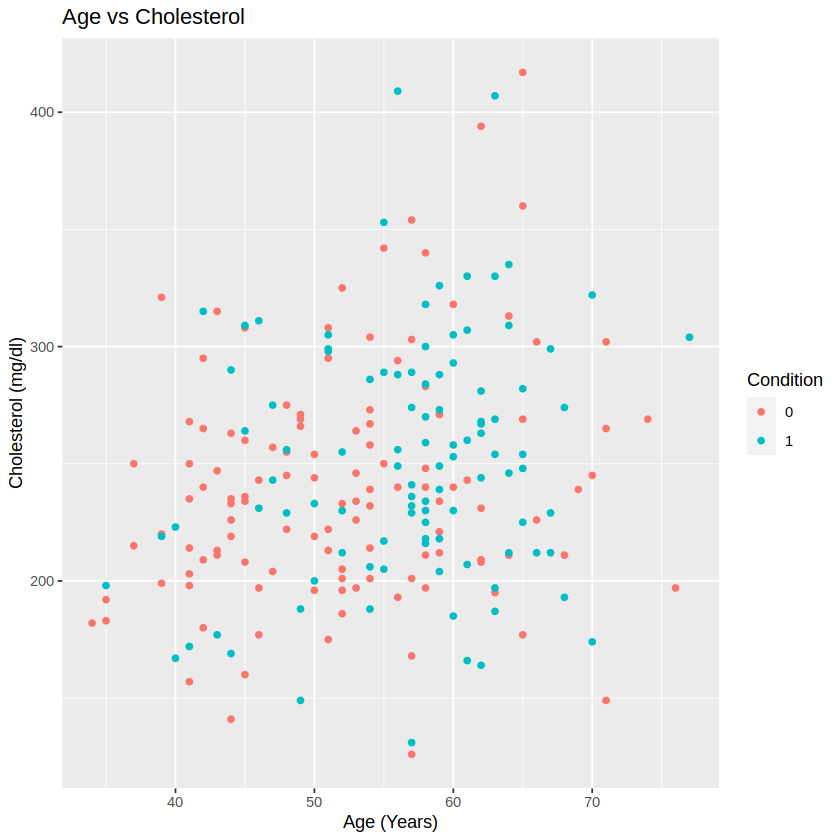

In [49]:
cleveland_graph <- ggplot(cleveland_train, aes(x = age, y = chol, color = condition)) + geom_point() + labs(x = "Age (Years)", y = "Cholesterol (mg/dl)", color = "Condition") + ggtitle("Age vs Cholesterol")
#plot 1

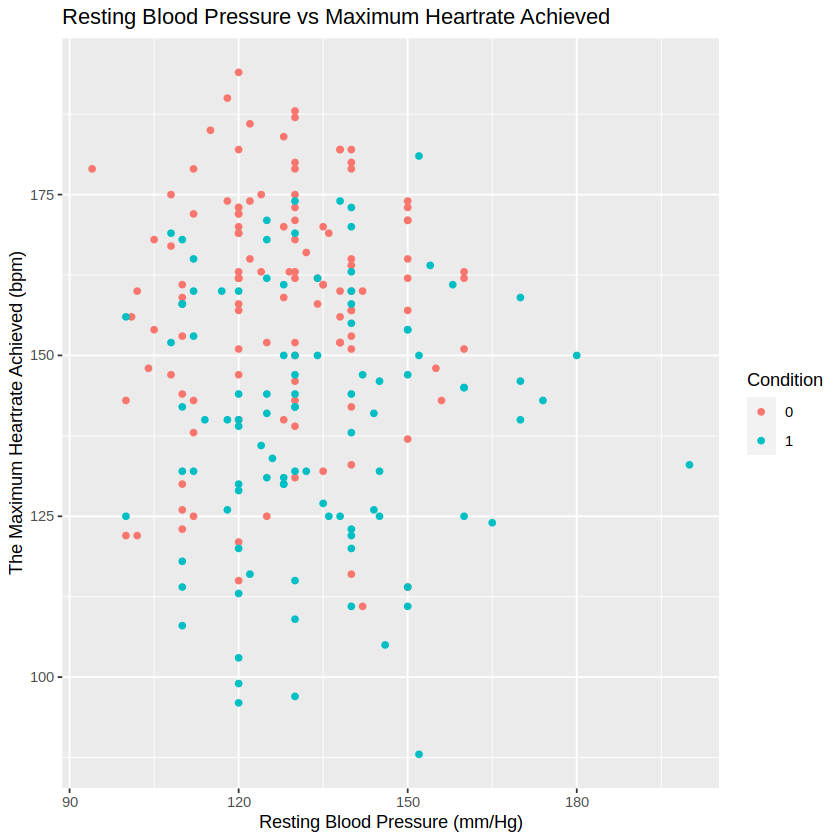

In [50]:
cleveland_graph2 <- ggplot(cleveland_train, aes(x = trestbps, y = thalach, color = condition)) + geom_point() + labs(x = "Resting Blood Pressure (mm/Hg)", y = "The Maximum Heartrate Achieved (bpm)", color = "Condition") + ggtitle("Resting Blood Pressure vs Maximum Heartrate Achieved")
#generating graph 2

Study on Heart Disease Database

Introduction:
Heart disease affects millions of people every year. In order to help prevent and potentially save lives, it is important to predict what can help prevent and detect these diseases in the early stages. With database we are using, we aim to investigate the relationship between different factors such as age, sex, number of major blood vessels colored by fluoroscopy, resting blood pressure, maximum heart rate achieved, cholesterol, and percentage of narrowing in any major vessel (condition). The condition can be 0, which means the patient has no heart disease, and 1, which means the patient does have heart disease.

The question we will be answering with this project is: how do age, resting blood pressure, maximum heart rate achieved, and cholesterol influence the percentage of narrowing of in any major vessel (condition)?

The dataset we will utilize is "Study on Heart Disease Database”. For our analysis, we'll primarily be focusing on the Cleveland database.

Preliminary exploratory data analysis:
This data was already in the tidy format. 

Table:

In [51]:
cleveland_table

condition,numOfRows,average_age,average_trestbps,average_chol,average_thalach
<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,120,52.18333,127.5000,240.0917,158.2667
1,102,56.82353,133.2157,250.9902,139.8333


This table shows the difference of the number of rows, average age, average_trestbps, average_cholm and average_thalach between both of the factors. 

Visualizations:

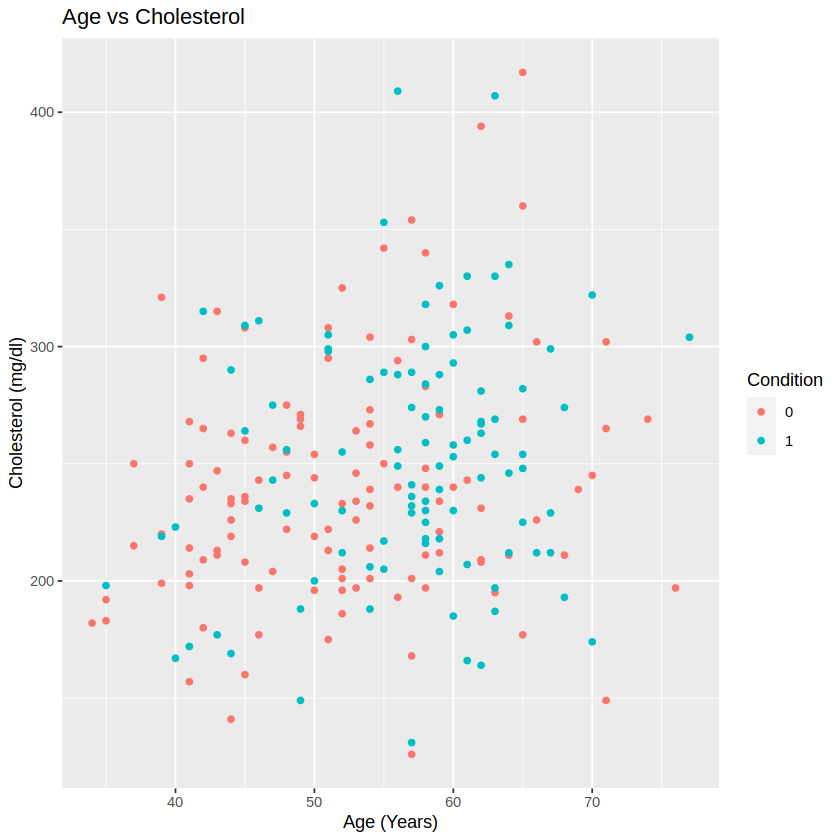

In [52]:
cleveland_graph

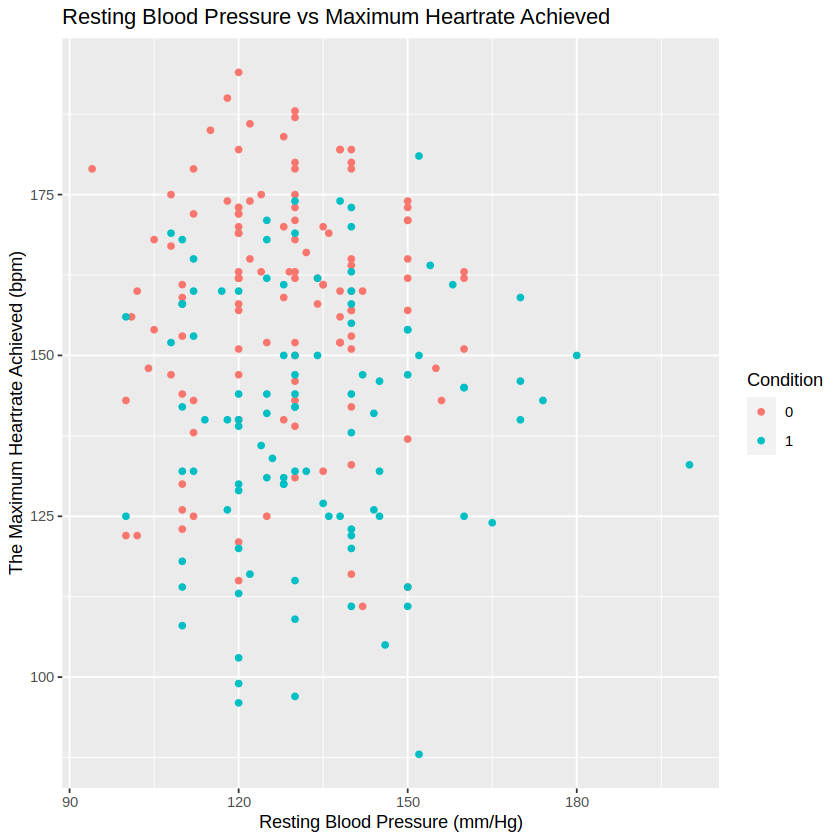

In [53]:
cleveland_graph2

In graph one, there is a clearer correlation between cholesterol, age, and condition, but in graph two it is less obvious. We may need to change and test more variables to guarantee we make a useful model.